# Building a decision tree classifier using Python's scikit-learn library to predict customer churn based on historical data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\\Users\\admin\\Desktop\\tycs 14\\DW\\churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Here we can infer that columns Rownumber, CustomerId, and Surname only describe customers uniquely and do not affect the target variable, so we can drop these columns.The other observation is we have two more categorical columns, geography, and gender, which we will encode using labelencoder() provided by the sklearn library of python.

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Plotting Boxplot to check outliers

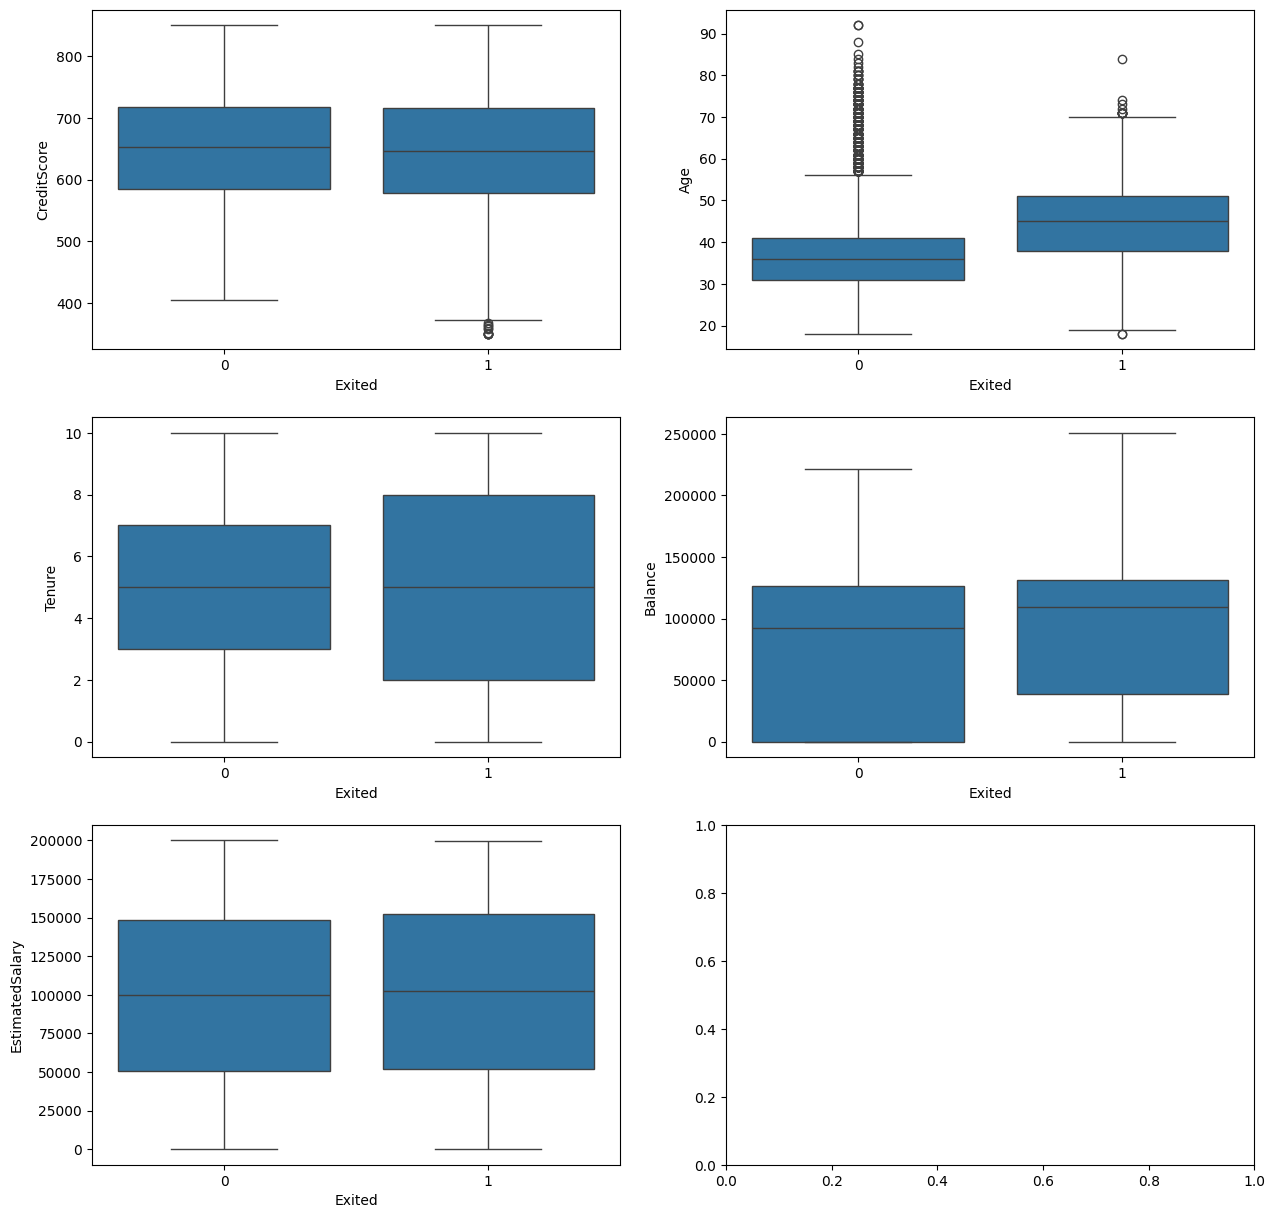

In [10]:
numcols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x = 'Exited', y = i , data = df, ax = subplot)
    
plt.show()

Removing outliers. Outliers are those data samples that are present far from the other data samples. They drastically affect the learning of the model and manipulate the predictions towards them. There are two standard methods to remove outliers: Inter Quartile Range (IQR) or Standard deviation. We will be using the IQR method to remove the outliers:

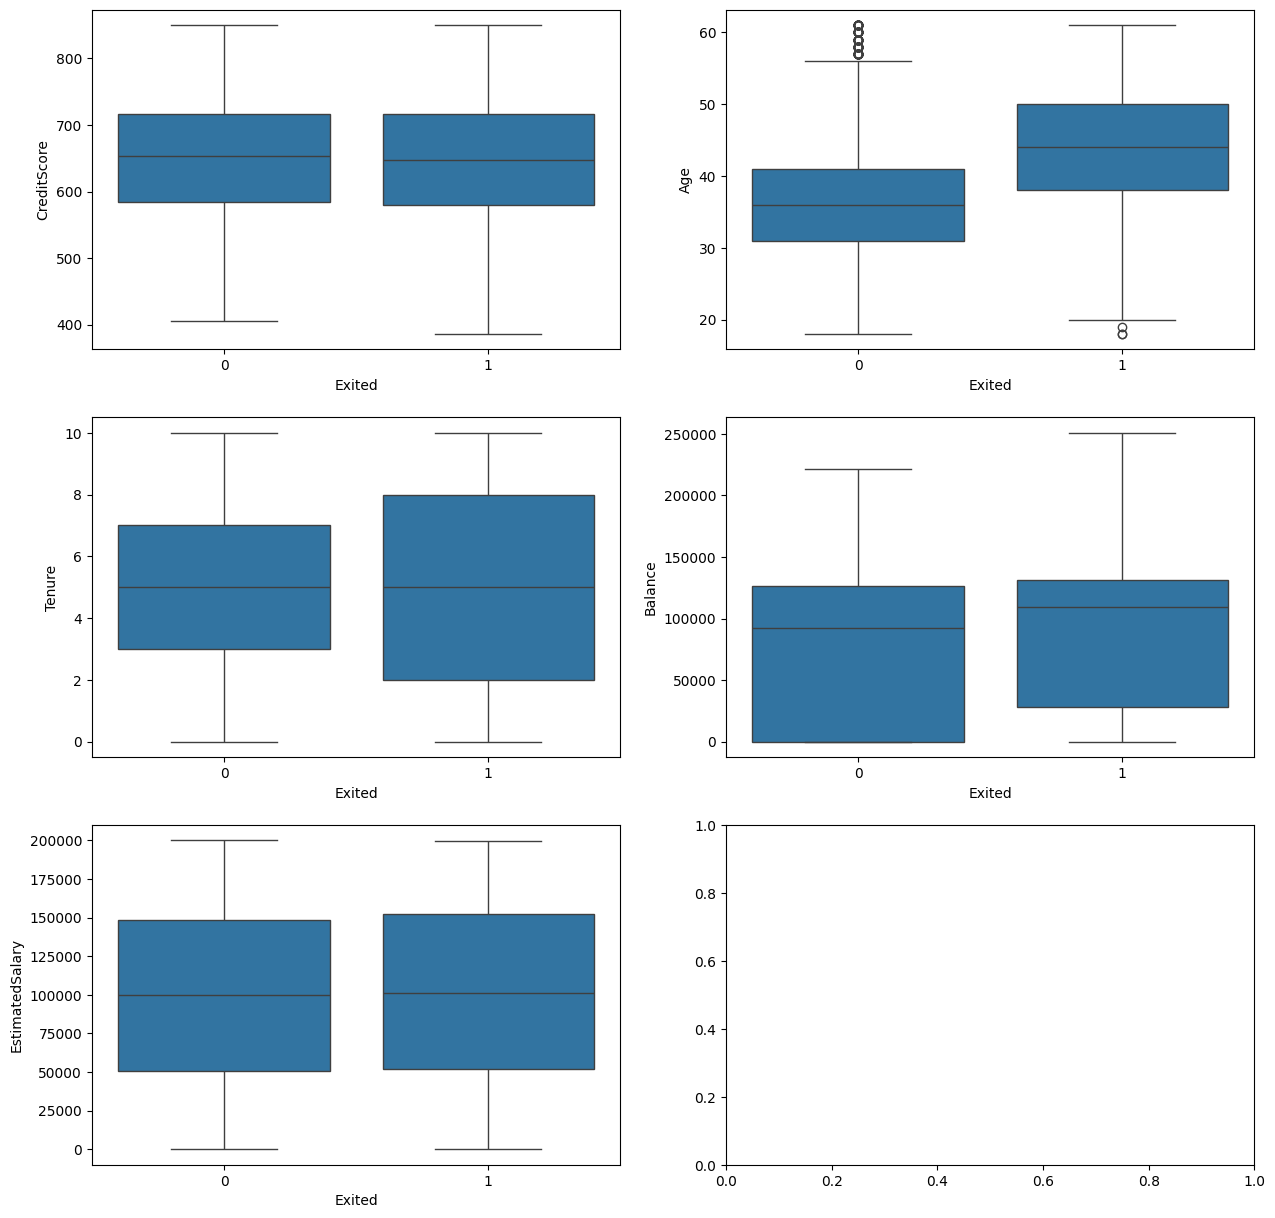

In [11]:
for i in numcols:
    q75, q25 = np.percentile(df[i], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    df=df[(df[i]<max_val)]
    df=df[(df[i]>min_val)]
    
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x = 'Exited', y = i , data = df, ax = subplot)
    
plt.show()

Transforming non-numerical labels to numerical labels. We have two more categorical columns, geography, and gender, which we will encode using labelencoder() provided by the sklearn library of python.

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
le.classes_
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dtree=DecisionTreeClassifier()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
X=df.drop('Exited',axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
dtree.fit(X_train,y_train)
dtree_predict=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
print(f" Classification report :\n {classification_report(y_test,dtree_predict)}")

print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, dtree_predict))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, dtree_predict))

 Classification report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      2290
           1       0.43      0.45      0.44       582

    accuracy                           0.77      2872
   macro avg       0.65      0.65      0.65      2872
weighted avg       0.77      0.77      0.77      2872

Accuracy (Test Set): 0.77
F1-Score (Test Set): 0.44


In [15]:
dtc_new = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, min_samples_leaf = 6 , max_features = 'sqrt', random_state = 1)
dtc_new.fit(X_train,y_train)
dtc_predict=dtc_new.predict(X_test)

In [16]:
print(f" Classification report :\n {classification_report(y_test,dtc_predict)}")
print(f" Confusion Matrix  :\n {confusion_matrix(y_test,dtc_predict)}")

 Classification report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2290
           1       0.65      0.42      0.51       582

    accuracy                           0.84      2872
   macro avg       0.76      0.68      0.71      2872
weighted avg       0.82      0.84      0.82      2872

 Confusion Matrix  :
 [[2157  133]
 [ 337  245]]


In [17]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, dtc_predict))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, dtc_predict))

Accuracy (Test Set): 0.84
F1-Score (Test Set): 0.51


[Text(0.5686985523137554, 0.9736842105263158, 'x[1] <= 0.5\nentropy = 0.723\nsamples = 6701\nvalue = [5356, 1345]'),
 Text(0.37715325451309434, 0.9210526315789473, 'x[5] <= 166896.133\nentropy = 0.625\nsamples = 3380\nvalue = [2852, 528]'),
 Text(0.3202866768370201, 0.868421052631579, 'x[6] <= 2.5\nentropy = 0.605\nsamples = 3248\nvalue = [2767, 481]'),
 Text(0.23579328756674295, 0.8157894736842105, 'x[9] <= 198814.188\nentropy = 0.555\nsamples = 3164\nvalue = [2755, 409]'),
 Text(0.23375921688278667, 0.7631578947368421, 'x[6] <= 1.5\nentropy = 0.558\nsamples = 3141\nvalue = [2732, 409]'),
 Text(0.1225209763539283, 0.7105263157894737, 'x[5] <= 62266.955\nentropy = 0.748\nsamples = 1590\nvalue = [1251, 339]'),
 Text(0.05061339944063056, 0.6578947368421053, 'x[3] <= 44.5\nentropy = 0.958\nsamples = 442\nvalue = [274, 168]'),
 Text(0.02545766590389016, 0.6052631578947368, 'x[3] <= 39.5\nentropy = 0.77\nsamples = 306\nvalue = [237, 69]'),
 Text(0.013030765319094839, 0.5526315789473685, 'x[

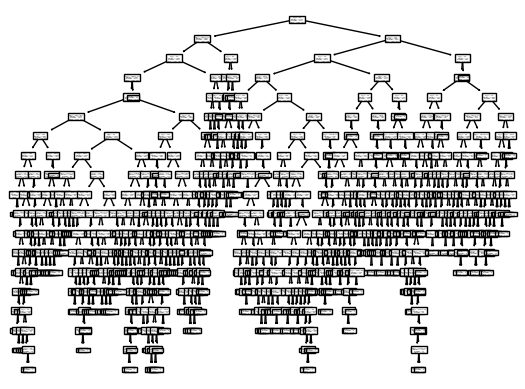

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10,min_samples_leaf = 6 , max_features = 'sqrt', random_state = 1)
clf1=clf.fit(X_train,y_train)
tree.plot_tree(clf1)